In [2]:
print("ok")

ok


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\TPWODL\New folder_Content\TimeSeriesForecasting_End_To_End\data\raw\AEP_hourly.csv")

In [5]:
df

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [6]:
df.tail()

,Datetime,AEP_MW
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0
121272,2018-01-02 00:00:00,19993.0


In [7]:
df.shape

(121273, 2)

In [8]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
121268    False
121269    False
121270    False
121271    False
121272    False
Length: 121273, dtype: bool

In [9]:
df.isnull().sum()

Datetime    0
AEP_MW      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [12]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [14]:
# ============================================================================
# 1. DATA LOADING & PREPROCESSING
# ============================================================================
print("="*70)
print("STEP 1: DATA LOADING & PREPROCESSING")
print("="*70)

# Load data
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime').reset_index(drop=True)

# Remove duplicates and handle missing values
df = df.drop_duplicates(subset=['Datetime'])
df['AEP_MW'] = df['AEP_MW'].interpolate(method='linear')

print(f"Data shape: {df.shape}")
print(f"Date range: {df['Datetime'].min()} to {df['Datetime'].max()}")
print(f"Missing values: {df['AEP_MW'].isna().sum()}")
print(f"\nFirst few rows:\n{df.head()}")
print(f"\nData statistics:\n{df['AEP_MW'].describe()}")

STEP 1: DATA LOADING & PREPROCESSING
Data shape: (121269, 2)
Date range: 2004-10-01 01:00:00 to 2018-08-03 00:00:00
Missing values: 0

First few rows:
             Datetime   AEP_MW
0 2004-10-01 01:00:00  12379.0
1 2004-10-01 02:00:00  11935.0
2 2004-10-01 03:00:00  11692.0
3 2004-10-01 04:00:00  11597.0
4 2004-10-01 05:00:00  11681.0

Data statistics:
count    121269.000000
mean      15499.652351
std        2591.321478
min        9581.000000
25%       13630.000000
50%       15310.000000
75%       17200.000000
max       25695.000000
Name: AEP_MW, dtype: float64


In [15]:
df

,Datetime,AEP_MW
0,2004-10-01 01:00:00,12379.0
1,2004-10-01 02:00:00,11935.0
2,2004-10-01 03:00:00,11692.0
3,2004-10-01 04:00:00,11597.0
4,2004-10-01 05:00:00,11681.0
...,...,...
121268,2018-08-02 20:00:00,17673.0
121269,2018-08-02 21:00:00,17303.0
121270,2018-08-02 22:00:00,17001.0
121271,2018-08-02 23:00:00,15964.0



STEP 2: EXPLORATORY DATA ANALYSIS


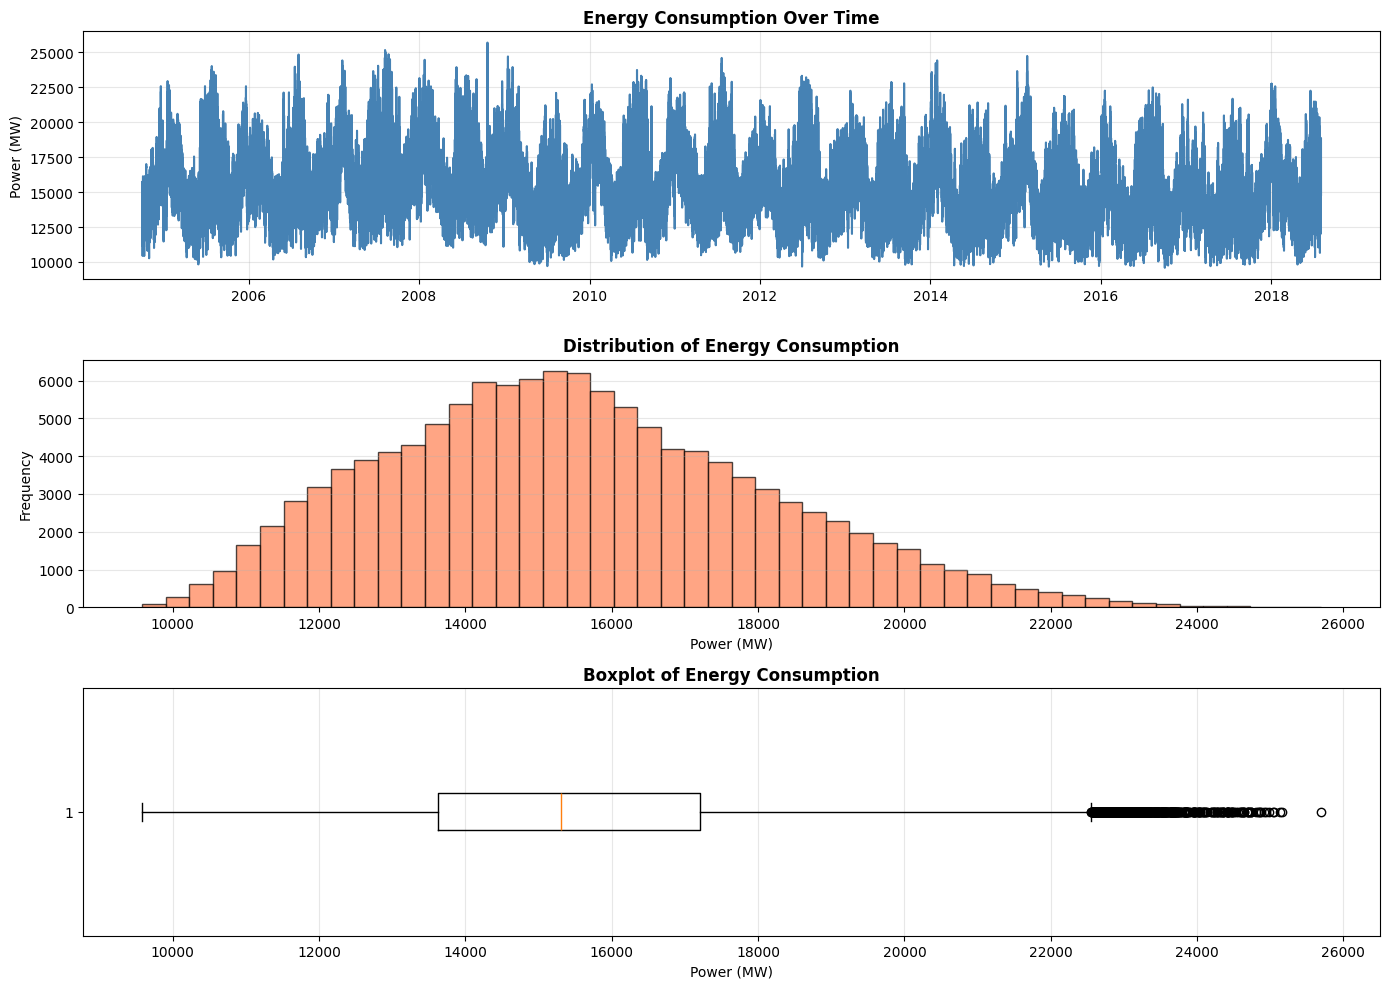

Mean consumption: 15499.65 MW
Std deviation: 2591.32 MW
Min consumption: 9581.00 MW
Max consumption: 25695.00 MW


In [16]:
# ============================================================================
# 2. EXPLORATORY DATA ANALYSIS
# ============================================================================
print("\n" + "="*70)
print("STEP 2: EXPLORATORY DATA ANALYSIS")
print("="*70)

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Time series plot
axes[0].plot(df['Datetime'], df['AEP_MW'], linewidth=1.5, color='steelblue')
axes[0].set_title('Energy Consumption Over Time', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Power (MW)')
axes[0].grid(True, alpha=0.3)

# Distribution
axes[1].hist(df['AEP_MW'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Energy Consumption', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Power (MW)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3, axis='y')

# Boxplot
axes[2].boxplot(df['AEP_MW'], vert=False)
axes[2].set_title('Boxplot of Energy Consumption', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Power (MW)')
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('01_eda_analysis.png', dpi=100, bbox_inches='tight')
plt.show()

print(f"Mean consumption: {df['AEP_MW'].mean():.2f} MW")
print(f"Std deviation: {df['AEP_MW'].std():.2f} MW")
print(f"Min consumption: {df['AEP_MW'].min():.2f} MW")
print(f"Max consumption: {df['AEP_MW'].max():.2f} MW")

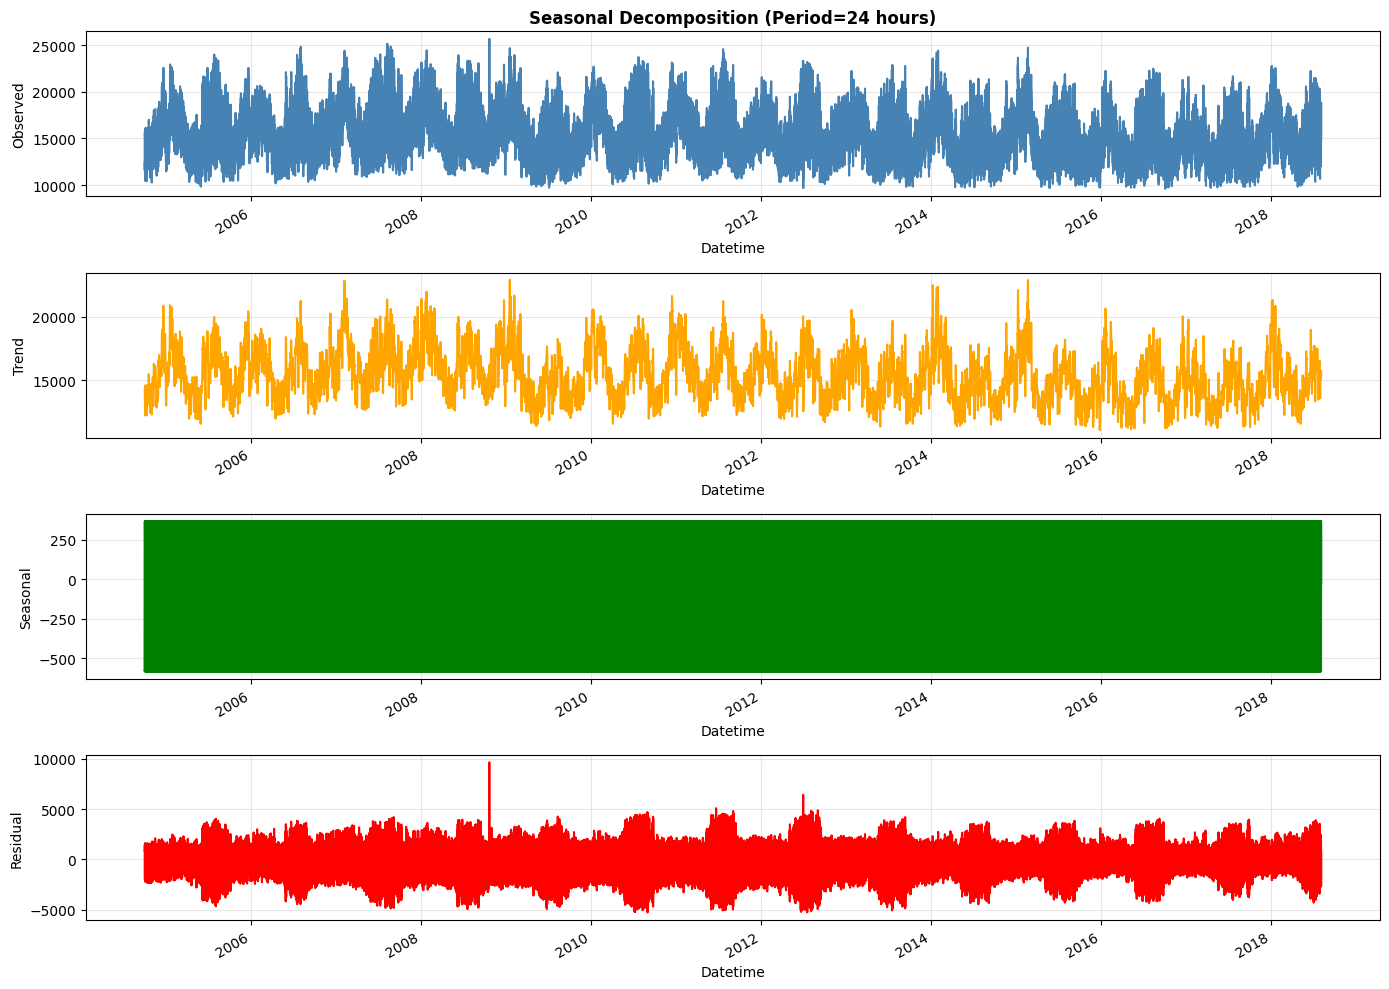

In [19]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

ts_data = df.set_index('Datetime')['AEP_MW']

# Perform decomposition without 'extrapolate'
decomposition = seasonal_decompose(ts_data, model='additive', period=24)

fig, axes = plt.subplots(4, 1, figsize=(14, 10))
decomposition.observed.plot(ax=axes[0], color='steelblue')
axes[0].set_ylabel('Observed')
axes[0].set_title('Seasonal Decomposition (Period=24 hours)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

decomposition.trend.plot(ax=axes[1], color='orange')
axes[1].set_ylabel('Trend')
axes[1].grid(True, alpha=0.3)

decomposition.seasonal.plot(ax=axes[2], color='green')
axes[2].set_ylabel('Seasonal')
axes[2].grid(True, alpha=0.3)

decomposition.resid.plot(ax=axes[3], color='red')
axes[3].set_ylabel('Residual')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
